# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tazovsky
Processing Record 2 of Set 1 | queenstown
Processing Record 3 of Set 1 | fort mcmurray
Processing Record 4 of Set 1 | dayr al balah
Processing Record 5 of Set 1 | hawaiian paradise park
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | luderitz
Processing Record 9 of Set 1 | ad dawadimi
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | wailua homesteads
Processing Record 13 of Set 1 | vilyuchinsk
Processing Record 14 of Set 1 | santa rosa
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | kenai
Processing Record 18 of Set 1 | isafjordur
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | aginskoye
Processing Record 21 of Set 1 | andi
Processing Record 22 of Set 1 

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tazovsky,67.4667,78.7000,-25.84,99,67,2.02,RU,1732124418
1,queenstown,-31.8976,26.8753,18.65,85,99,1.99,ZA,1732124419
2,fort mcmurray,56.7268,-111.3810,-16.23,85,100,3.09,CA,1732124420
3,dayr al balah,31.4166,34.3452,20.04,60,0,0.48,PS,1732124421
4,hawaiian paradise park,19.5933,-154.9731,21.61,100,100,2.57,US,1732124422


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazovsky,67.4667,78.7000,-25.84,99,67,2.02,RU,1732124418
1,queenstown,-31.8976,26.8753,18.65,85,99,1.99,ZA,1732124419
2,fort mcmurray,56.7268,-111.3810,-16.23,85,100,3.09,CA,1732124420
3,dayr al balah,31.4166,34.3452,20.04,60,0,0.48,PS,1732124421
4,hawaiian paradise park,19.5933,-154.9731,21.61,100,100,2.57,US,1732124422


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

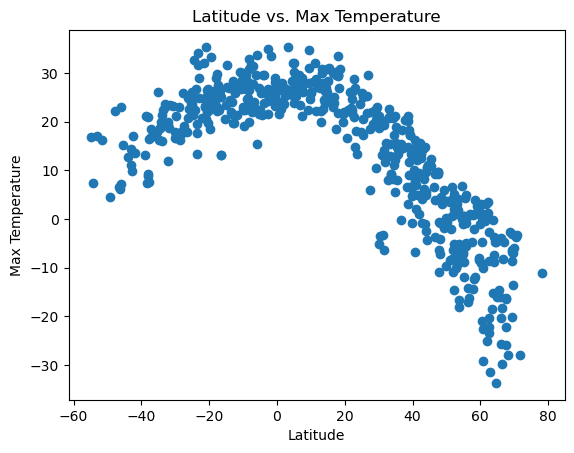

In [19]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], label='Cities' )
plt.title('Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

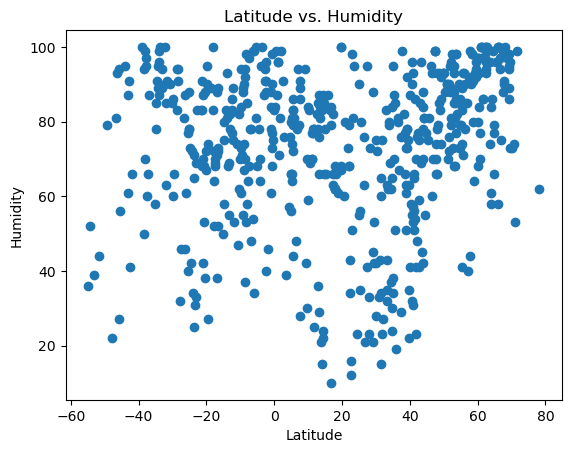

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], label='Cities' )
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

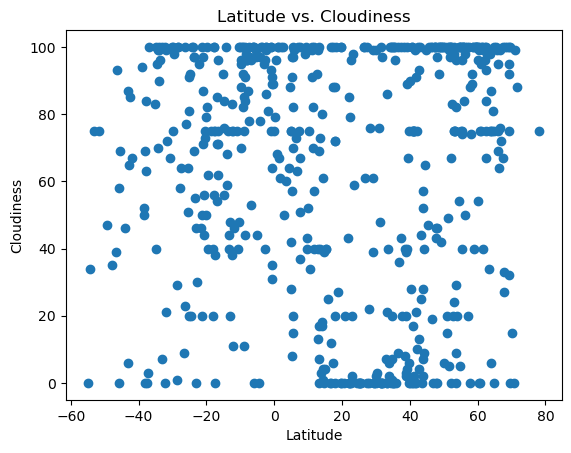

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], label='Cities' )
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

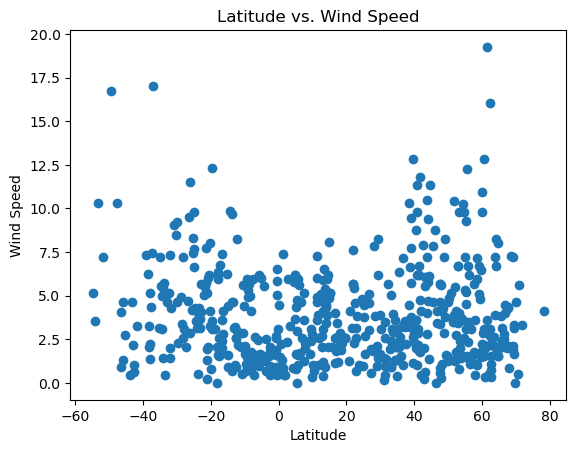

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], label='Cities' )
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope , intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_value = slope * x_values + intercept
    linequatin = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression_value, color='red')
    plt.title(f'latitude vs {title}')
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.annotate(linequatin, text_coordinates)
    plt.show()

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazovsky,67.4667,78.7000,-25.84,99,67,2.02,RU,1732124418
2,fort mcmurray,56.7268,-111.3810,-16.23,85,100,3.09,CA,1732124420
3,dayr al balah,31.4166,34.3452,20.04,60,0,0.48,PS,1732124421
4,hawaiian paradise park,19.5933,-154.9731,21.61,100,100,2.57,US,1732124422
5,yellowknife,62.4560,-114.3525,-20.33,96,75,3.09,CA,1732124424


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,queenstown,-31.8976,26.8753,18.65,85,99,1.99,ZA,1732124419
7,luderitz,-26.6481,15.1594,17.83,81,9,4.69,NaN,1732124426
9,hithadhoo,-0.6000,73.0833,28.05,77,89,5.82,MV,1732124428
10,adamstown,-25.0660,-130.1015,22.67,88,81,7.68,PN,1732124429
14,waitangi,-43.9535,-176.5597,12.68,95,46,0.45,NZ,1732124433


###  Temperature vs. Latitude Linear Regression Plot

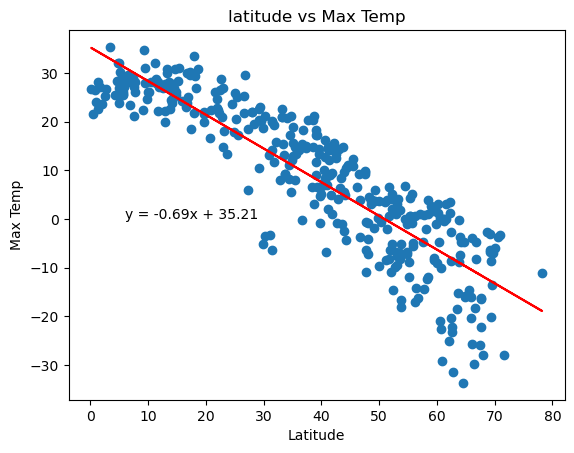

In [31]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plot_linear_regression (x_values, y_values, 'Max Temp', (6,0))


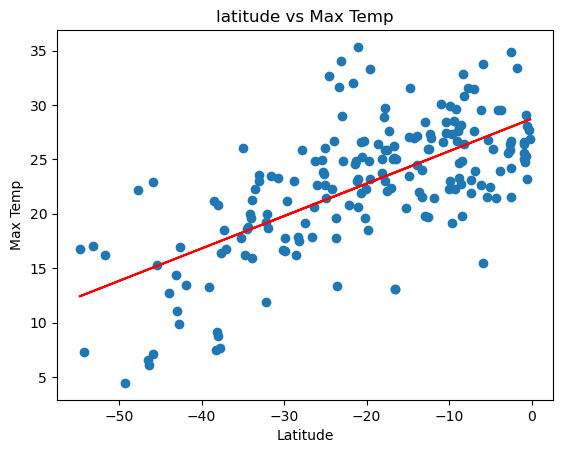

In [32]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plot_linear_regression (x_values, y_values, 'Max Temp', (6,0))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

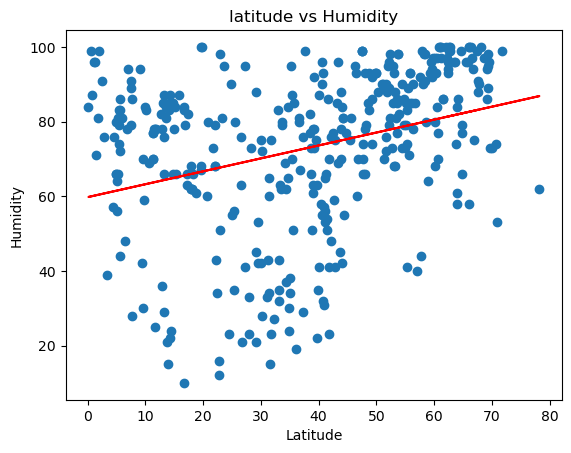

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression (x_values, y_values, 'Humidity', (6,0))

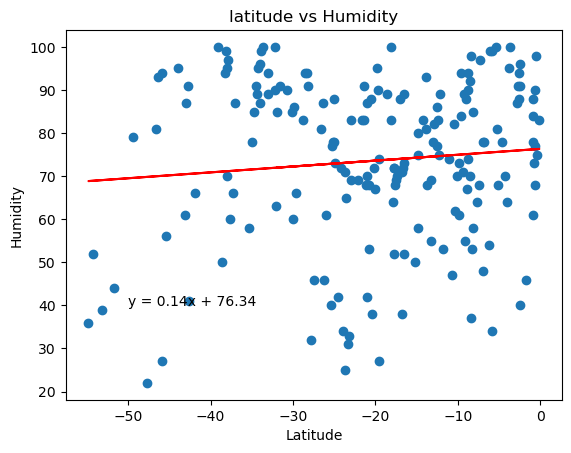

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression (x_values, y_values, 'Humidity', (-50,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

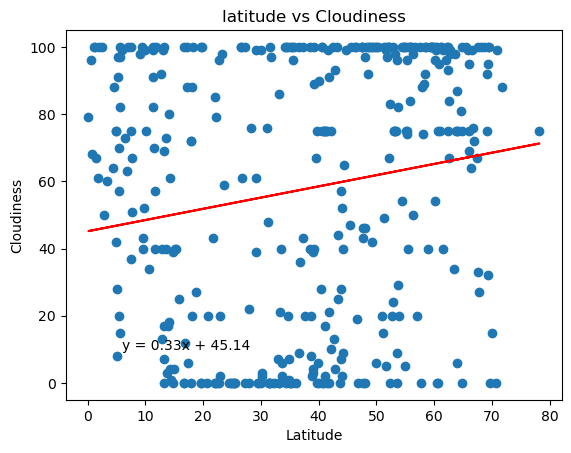

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression (x_values, y_values, 'Cloudiness', (6,10))

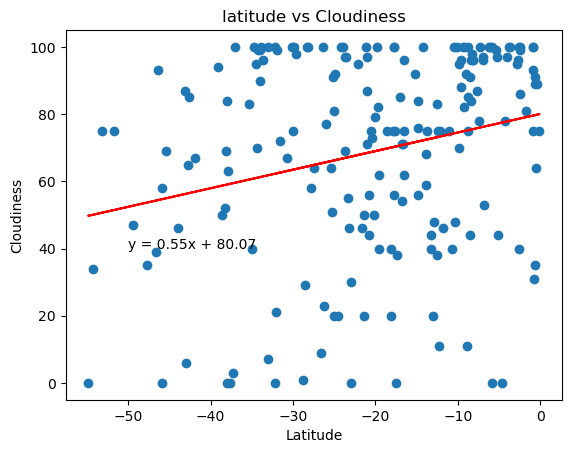

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression (x_values, y_values, 'Cloudiness', (-50,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

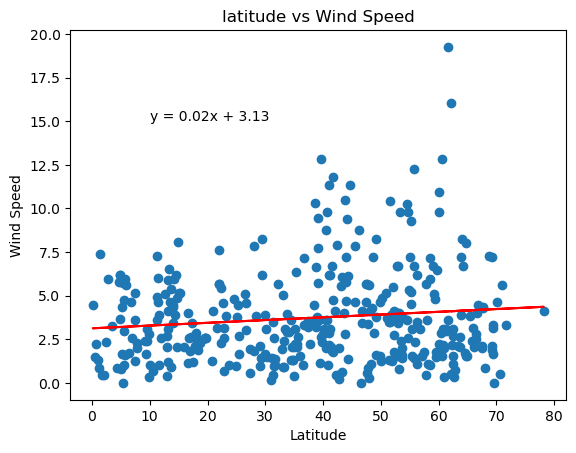

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression (x_values, y_values, 'Wind Speed', (10,15))

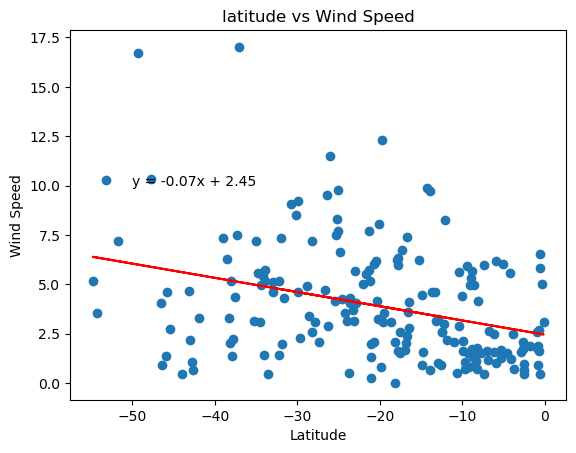

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression (x_values, y_values, 'Wind Speed', (-50,10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# There is no apperence relationship! 